In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [3]:
# load the files
file_vcf_imputed = 'chr22_start17000000_end22000000.imputation.beagle.masked.vcf'
file_vcf_genotyped = 'chr22_start17000000_end22000000.imputation.target.masked.vcf'

df_imputed = pd.read_csv(file_vcf_imputed,header=9,sep='\t')
df_geno = pd.read_csv(file_vcf_genotyped,header=29,sep='\t')

print(df_geno.shape[0])
print(df_imputed.shape[0])

In [5]:
df_geno.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,203291180083_R01C01,...,203683190119_R07C02,203683190119_R08C01,203683190119_R08C02,203683190119_R09C01,203683190119_R09C02,203683190119_R10C01,203683190119_R10C02,203683190119_R11C01,203683190119_R12C01,203683190119_R12C02
0,22,17158947,22:17158947A:G,A,G,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,22,17172130,22:17172130A:G,A,G,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,22,17201404,22:17201404A:C,A,C,.,.,PR,GT,0/1,...,0/1,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,1/1
3,22,17236951,22:17236951C:T,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/1,0/0,0/0
4,22,17380103,22:17380103C:T,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0


In [ ]:
# create common variant list
list_intersection = list(set(df_geno.ID).intersection(df_imputed.ID))

# converting genotypes in genetic dosage
geno_dict = {'0/0':0,'1/0':1,'0/1':1,'1/1':2}
imputed_dict = {'0|0':0,'1|0':1,'0|1':1,'1|1':2}

df_r2 = pd.DataFrame()

# iterating on common SNPs
for snp in list_intersection:
    print(snp)
    
    v_geno = df_geno.loc[df_geno.ID==snp].reset_index(drop=True).iloc[0,9:].map(geno_dict).values
    v_imp = df_imputed.loc[df_imputed.ID==snp].reset_index(drop=True).iloc[0,9:].map(imputed_dict).values
    
    # sleect samples with genotypes
    not_missing = (pd.Series(v_geno).isna()==False)

    # calculate pearson between genotyped and imputed vector
    pearson,pvalue = pearsonr(v_geno[not_missing],v_imp[not_missing])
    
    af = v_geno[not_missing].mean()/2
    df_r2 = df_r2.append({'snp':snp,'af':af,'r2':pearson*pearson},ignore_index=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


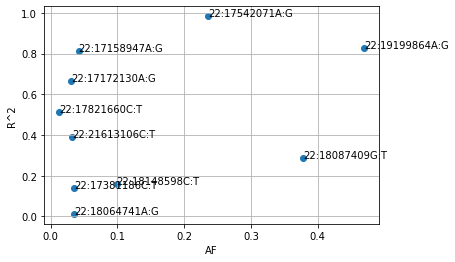

In [12]:
# for each SNP plot R2 vs allele frequency
plt.scatter(df_r2.af,df_r2.r2)
plt.grid()
plt.xlabel('AF')
plt.ylabel('R^2')
for i,snp in df_r2.iterrows():
    plt.text(snp.af,snp.r2,snp.snp)

In [14]:
pd.crosstab(v_geno[not_missing],v_imp[not_missing])

col_0,0,1
row_0,,
0.0,1066,8
1.0,169,55
2.0,14,4


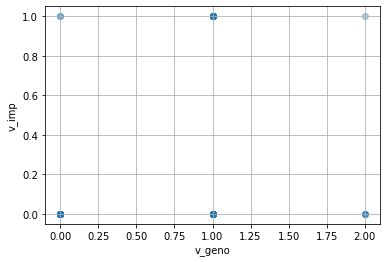

In [15]:
plt.scatter(v_geno,v_imp,alpha=0.1)
plt.xlabel('v_geno')
plt.ylabel('v_imp')
plt.grid()